In [1]:
import pandas

# 读入数据
file_path = './dataset20220613.xlsx'
df = pandas.read_excel(file_path)

In [2]:
df.shape

(1606, 89)

In [3]:
df.describe()

,Filnum,IDps,condition,Y,ltV,leV,trV,leS,trS,leT,...,Unnamed: 79,"trP(1,:)",Unnamed: 81,Unnamed: 82,"trP(2,:)",Unnamed: 84,Unnamed: 85,"trP(3,:)",Unnamed: 87,Unnamed: 88
count,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,...,1606.000000,1603.000000,1603.000000,1603.000000,1603.000000,1603.000000,1603.000000,1605.000000,1605.000000,1605.000000
mean,47.805106,0.586190,6.444583,1.420299,-3.602838,11.048121,10.452654,1239.980590,1259.292850,113.024907,...,-0.005770,-0.000376,-0.004820,-0.000402,0.000647,0.006426,-0.002721,0.000122,0.000099,0.000241
std,27.738162,0.343845,3.458753,0.493761,0.493052,1.069392,1.305388,57.380577,65.441512,10.203994,...,0.008221,0.001076,0.009215,0.002726,0.002169,0.009718,0.010308,0.000075,0.001060,0.000490
min,1.000000,0.002123,1.000000,1.000000,-5.378385,0.730107,0.677853,40.886000,36.795000,56.000000,...,-0.037180,-0.005012,-0.086864,-0.021300,-0.019435,-0.056733,-0.028460,-0.000134,-0.007092,-0.005271
25%,24.000000,0.189829,3.000000,1.000000,-3.881620,10.386939,9.546243,1216.707250,1235.441500,106.000000,...,-0.009586,-0.000899,-0.007604,-0.001511,0.000205,0.000603,-0.010726,0.000069,-0.000369,-0.000014
50%,48.000000,0.706795,6.000000,1.000000,-3.610828,10.997207,10.341909,1240.174000,1257.115000,113.000000,...,-0.001841,-0.000212,-0.003638,-0.000305,0.000527,0.004573,-0.000968,0.000132,0.000153,0.000060
75%,72.000000,0.931663,9.000000,2.000000,-3.318524,11.694295,11.406842,1261.705000,1287.585500,119.000000,...,0.000107,0.000289,-0.000642,0.000580,0.001078,0.010722,0.002259,0.000174,0.000658,0.000437
max,96.000000,1.076975,12.000000,2.000000,5.395248,14.565953,19.425290,1373.396800,1385.699000,145.000000,...,0.005016,0.004912,0.057088,0.021492,0.073405,0.054624,0.087027,0.000539,0.006317,0.007210


In [4]:
df.sample(5)

,Filnum,IDps,condition,Y,ltV,leV,trV,leS,trS,leT,...,Unnamed: 79,"trP(1,:)",Unnamed: 81,Unnamed: 82,"trP(2,:)",Unnamed: 84,Unnamed: 85,"trP(3,:)",Unnamed: 87,Unnamed: 88
393,20,0.964571,3,2,-3.877806,11.533131,11.584991,1234.045,1251.179,107,...,-0.006681,-0.000697,0.003278,-0.005865,0.000759,0.016212,-0.016707,0.000104,-0.000118,0.000367
1326,74,0.012387,10,2,-3.620100,11.384072,9.911717,1263.632,1258.788,111,...,-0.001716,-0.000859,0.000346,0.002242,0.000273,0.002121,0.002238,0.000098,-0.000751,0.000009
535,31,0.982807,4,2,-4.002241,11.746385,11.832898,1280.356,1277.953,109,...,-0.003432,-0.000806,-0.002401,-0.003112,0.000381,0.019951,-0.015578,0.000117,0.000011,0.000374
1159,65,0.187834,9,2,-2.986766,9.230618,8.698776,1209.211,1243.925,131,...,0.000300,-0.000204,-0.005975,0.000747,0.000997,-0.001573,0.007838,0.000174,-0.000055,0.000061
1482,91,0.778455,12,1,-3.868352,11.390836,10.508373,1321.337,1324.055,116,...,0.000206,0.000097,-0.005428,0.001155,0.000810,0.003971,-0.000306,0.000132,-0.000679,0.000016


In [5]:
#判断数据里面是否有缺失值
df.isnull().values.any()

True

In [6]:
df.isnull().values.sum()

531

In [7]:
#存在531个缺失值，删除这些缺失值
df.dropna(inplace=True)


In [8]:
df.shape

(1528, 89)

In [9]:
df.columns

Index(['Filnum', 'IDps', 'condition', 'Y', 'ltV', 'leV', 'trV', 'leS', 'trS',
       'leT', 'trT', 'leToeUi', 'leswpht', 'trToeUi', 'trswpht', 'leToeMa',
       'trToeMa', 'pelv(1,:)', 'Unnamed: 18', 'Unnamed: 19', 'pelv(2,:)',
       'Unnamed: 21', 'Unnamed: 22', 'pelv(3,:)', 'Unnamed: 24', 'Unnamed: 25',
       'pelv(4,:)', 'Unnamed: 27', 'Unnamed: 28', 'pelv(5,:)', 'Unnamed: 30',
       'Unnamed: 31', 'pelv(6,:)', 'Unnamed: 33', 'Unnamed: 34', 'leA(1,:)',
       'Unnamed: 36', 'Unnamed: 37', 'leA(2,:)', 'Unnamed: 39', 'Unnamed: 40',
       'leA(3,:)', 'Unnamed: 42', 'Unnamed: 43', 'trA(1,:)', 'Unnamed: 45',
       'Unnamed: 46', 'trA(2,:)', 'Unnamed: 48', 'Unnamed: 49', 'trA(3,:)',
       'Unnamed: 51', 'Unnamed: 52', 'leM(1,:)', 'Unnamed: 54', 'Unnamed: 55',
       'leM(2,:)', 'Unnamed: 57', 'Unnamed: 58', 'leM(3,:)', 'Unnamed: 60',
       'Unnamed: 61', 'trM(1,:)', 'Unnamed: 63', 'Unnamed: 64', 'trM(2,:)',
       'Unnamed: 66', 'Unnamed: 67', 'trM(3,:)', 'Unnamed: 69', 'Unnamed: 7

In [10]:
#用第二列的数值分四五个类
# 采用聚类思想
X = df[['ltV', 'leV', 'trV', 'leS', 'trS','leT', 'trT', 'leToeUi', 'leswpht', 'trToeUi', 'trswpht']]

In [11]:
X.shape

(1528, 11)

In [12]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
X = np.array(X)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(1528, 11)

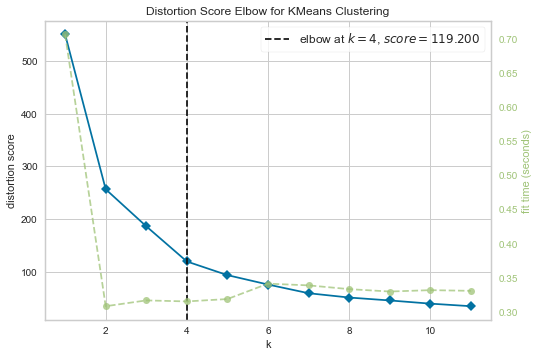

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12), timings=True)
visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()   

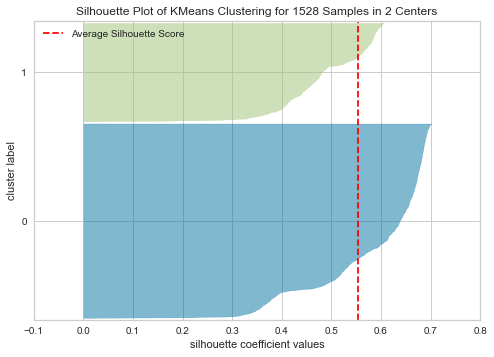

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1528 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [15]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
model = KMeans(2, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()   

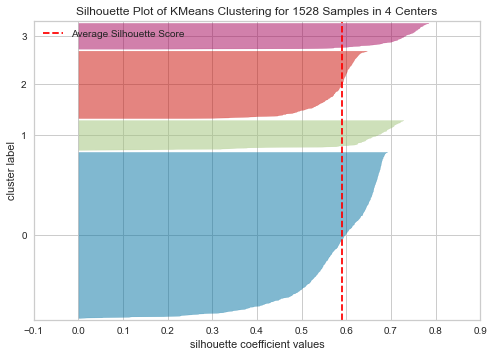

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1528 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [17]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()   

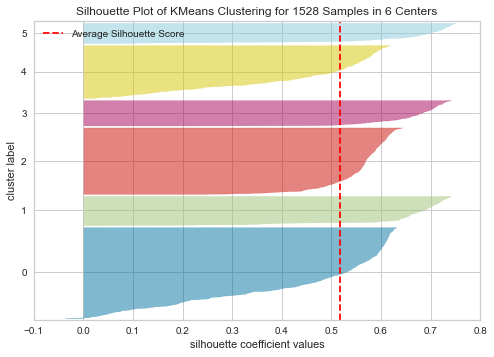

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1528 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [22]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
model = KMeans(6, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()   

从拐点图和轮廓系数图可以看出来，分成4类是最好的。

已知分成4类是最好的，现在尝试不同的聚类方法。
尝试更换聚类方法为一些需要指定聚类数量的方法。
1. K-means
2. Ward hierarchical clustering

In [54]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42).fit(X_scaled)
y=kmeans.labels_

In [24]:
y.shape

(1528,)

In [55]:
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 877]
 [  1 158]
 [  2 356]
 [  3 137]]


可视化kmeans聚类的结果。

d:\anaconda\lib\site-packages\yellowbrick\features\pca.py:458: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


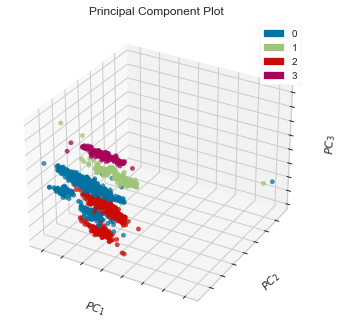

<Axes3DSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [26]:

from yellowbrick.features import PCA

classes = ['0', '1', '2', '3']

visualizer = PCA(
    scale=True, projection=3, classes=classes
)
visualizer.fit_transform(X_scaled, y)
visualizer.show()

In [39]:
from sklearn.cluster import AgglomerativeClustering

print("Compute unstructured hierarchical clustering...")
ward = AgglomerativeClustering(n_clusters=4, linkage="ward").fit(X_scaled)
y = ward.labels_
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)

Compute unstructured hierarchical clustering...
[[  0 878]
 [  1 157]
 [  2 356]
 [  3 137]]


d:\anaconda\lib\site-packages\yellowbrick\features\pca.py:458: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


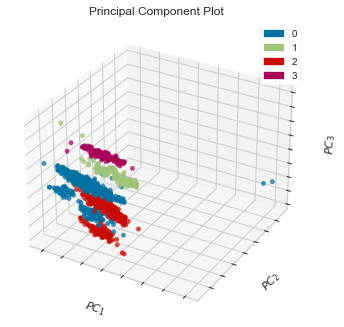

<Axes3DSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [40]:
from yellowbrick.features import PCA

classes = ['0', '1', '2', '3']

visualizer = PCA(
    scale=True, projection=3, classes=classes
)
visualizer.fit_transform(X_scaled, y)
visualizer.show()

可以AgglomerativeClustering看到和kmeans聚类的结果差不多。
现在尝试不需要制定聚类数量的方法。
1. Affinity propagation
2. Mean-shift
3. DBSCAN

In [53]:
from sklearn.cluster import AffinityPropagation
af = AffinityPropagation().fit(X_scaled)
cluster_centers_indices = af.cluster_centers_indices_
y = af.labels_
n_clusters_ = len(cluster_centers_indices)
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 209]
 [  1  50]
 [  2  16]
 [  3  19]
 [  4 296]
 [  5   1]
 [  6   2]
 [  7  19]
 [  8  71]
 [  9  51]
 [ 10  50]
 [ 11  43]
 [ 12  52]
 [ 13 101]
 [ 14  48]
 [ 15   2]
 [ 16 120]
 [ 17  77]
 [ 18  95]
 [ 19 118]
 [ 20  66]
 [ 21  22]]


d:\anaconda\lib\site-packages\sklearn\cluster\_affinity_propagation.py:236: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


In [42]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X_scaled)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_scaled)
y = ms.labels_
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 875]
 [  1 356]
 [  2 154]
 [  3 137]
 [  4   2]
 [  5   3]
 [  6   1]]


In [52]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.4, min_samples=20).fit(X_scaled)
y = db.labels_
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ -1   6]
 [  0 874]
 [  1 155]
 [  2 356]
 [  3 137]]


上述方法可以看到要么和kmeans的结果相似，要么结果不靠谱。因此最终决定采用kmeans聚类的结果。

In [56]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(X_scaled)
y=kmeans.labels_


In [59]:
df['label'] = y

In [60]:
df.shape

(1528, 90)

In [1]:
df.to_excel('./dataset20220613_label.xlsx', index=False)

NameError: name 'df' is not defined